In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_digits
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.cluster import KMeans
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
%matplotlib inline

In [60]:
def get_diabetes_dataset():
    dataset = load_diabetes()
    
    col_names = dataset['feature_names']
    
    data_frame = pd.DataFrame(columns=col_names, data=dataset['data'])
    
    data_frame['target'] = dataset['target']
    
    return data_frame

In [99]:
def get_digits_dataset(debug=False):
    dataset = load_digits()
    
    dimensions = ['dim{}'.format(i) for i in range(len(dataset['data'][0]))]
    
    data_frame = pd.DataFrame(columns=dimensions, data=dataset['data'])
    data_frame['target'] = dataset['target']
    
    if debug:
        for i in range(10):
            sns.heatmap(dataset['data'][i].reshape(8, 8))
            plt.title('Heatmap for instance {} of dataset (actual digit is {})'.format(i, dataset['target'][i]))
            plt.show()
    
    return data_frame

In [62]:
diabetes = get_diabetes_dataset()

In [100]:
digits = get_digits_dataset()

In [64]:
diabLinRegUniVariate = LinearRegression()

In [65]:
diabLinRegUniVariate.fit(diabetes['age'].values.reshape(-1, 1), diabetes['target'])
diabLinRegUniVariate.score(diabetes['age'].values.reshape(-1, 1), diabetes['target'])

0.035302182646716362

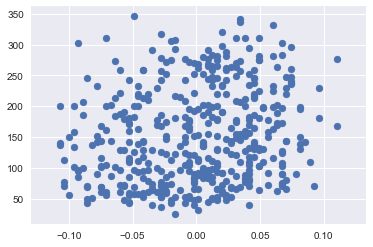

In [66]:
plt.scatter(x=diabetes['age'], y=diabetes['target'])

In [67]:
diabLinRegMultiVariate = LinearRegression()

In [68]:
diabLinRegMultiVariate.fit(diabetes.drop('target', axis=1), diabetes['target'])
diabLinRegMultiVariate.score(diabetes.drop('target', axis=1), diabetes['target'])

0.51774942541329338

In [69]:
diabSVR = SVR(kernel='rbf')

In [70]:
diabSVR.fit(diabetes.drop('target', axis=1), diabetes['target'])
diabSVR.score(diabetes.drop('target', axis=1), diabetes['target'])

-0.015949737981720169

In [71]:
diabNN = MLPRegressor(hidden_layer_sizes=(10, 10),  max_iter=10000, random_state=0)

In [72]:
diabNN.fit(diabetes.drop('target', axis=1), diabetes['target'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [73]:
diabNN.score(diabetes.drop('target', axis=1), diabetes['target'])

0.50418167529839597

In [82]:
def reduce_dim(dataset):
    pc = PCA()
    pc.fit(dataset.drop('target', axis=1))
    
    total_variance = 0
    n_dimensions = 0

    for i, var in enumerate(pc.explained_variance_ratio_):
        if total_variance < 0.95:
            total_variance += var
        else:
            n_dimensions = i - 1
            break
            
    pc2 = PCA(n_components=n_dimensions)
    
    pc2.fit(dataset.drop('target', axis=1))
    
    new_data = pc2.transform(dataset.drop('target', axis=1))
    
    new_frame = pd.DataFrame(columns=['dim{}'.format(i) for i in range(n_dimensions)], data=new_data)
    new_frame['target'] = dataset['target']
    
    return new_frame

In [83]:
new_frame = reduce_dim(diabetes)

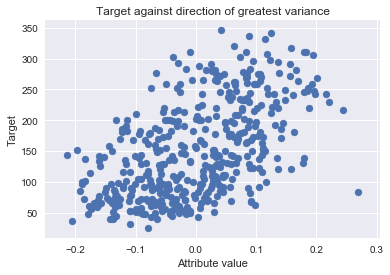

In [84]:
plt.scatter(x=new_frame['dim0'], y=new_frame['target'])
plt.title('Target against direction of greatest variance')
plt.xlabel('Attribute value')
plt.ylabel('Target')
plt.show()

In [85]:
diabNN2 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=0)
diabNN2.fit(new_frame.drop('target',axis=1), new_frame['target'])
diabNN2.score(new_frame.drop('target',axis=1), new_frame['target'])

0.50699323855156675

In [86]:
diabKNN = KNeighborsRegressor(n_neighbors=10)

In [87]:
diabKNN.fit(new_frame.drop('target',axis=1), new_frame['target'])
diabKNN.score(new_frame.drop('target',axis=1), new_frame['target'])

0.54118561099648588

In [88]:
graph_data = np.zeros((19, ))

In [89]:
n_elems = new_frame.shape[0]
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(new_frame.drop('target',axis=1).iloc[:n_elems // 2], new_frame['target'][:n_elems // 2])
    graph_data[i-1] = knn.score(new_frame.drop('target',axis=1).iloc[n_elems // 2:], new_frame['target'][n_elems // 2:])

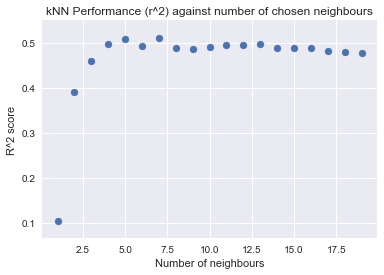

In [90]:
plt.scatter(x=range(1, 20), y=graph_data)
plt.title('kNN Performance (r^2) against number of chosen neighbours')
plt.xlabel('Number of neighbours')
plt.ylabel('R^2 score')
plt.show()

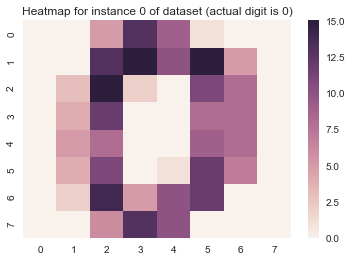

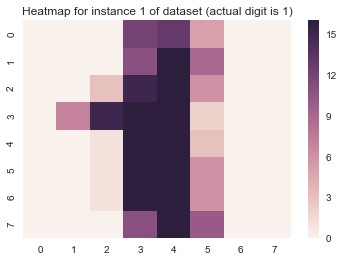

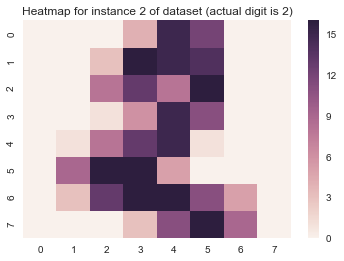

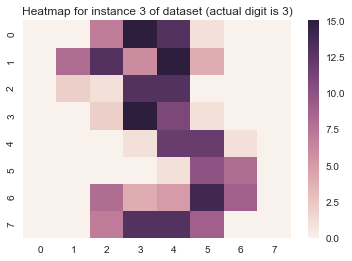

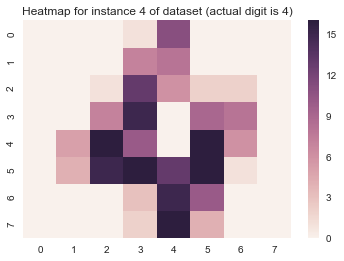

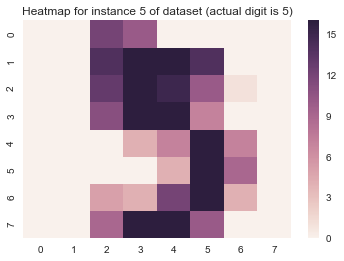

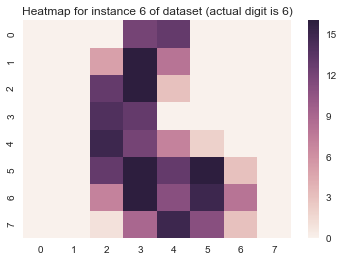

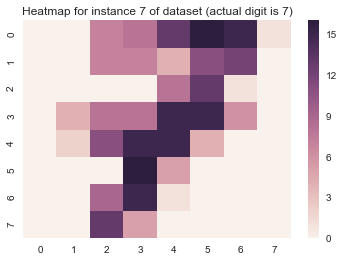

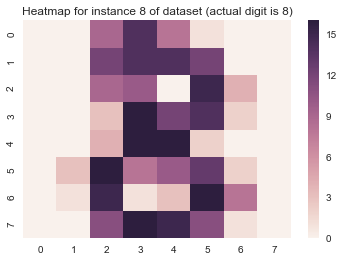

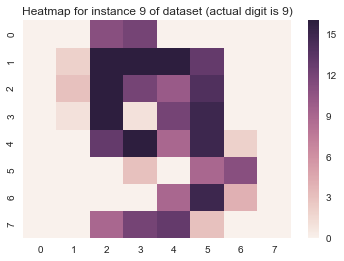

,dim0,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [91]:
get_digits_dataset(debug=True)

In [102]:
def split(frame):
    n_elems = len(frame)
    frame_testing_set = frame.drop('target', axis=1).iloc[: n_elems // 2]
    frame_training_set = frame.drop('target', axis=1).iloc[n_elems // 2 :]
    frame_testing_labels = frame['target'][: n_elems // 2]
    frame_training_labels = frame['target'][n_elems // 2:]

    return frame_training_set, frame_training_labels, frame_testing_set, frame_testing_labels

digits_training_set, digits_training_labels, digits_testing_set, digits_testing_labels = split(digits)

In [95]:
digitsLinReg = LinearRegression()
digitsLinReg.fit(digits_training_set, digits_training_labels)
digitsLinReg.score(digits_testing_set, digits_testing_labels)

0.53490541388466695

In [96]:
digitsRandomForrest = RandomForestClassifier(n_estimators=700)
digitsRandomForrest.fit(digits_training_set, digits_training_labels)
digitsRandomForrest.score(digits_testing_set, digits_testing_labels)

0.92316258351893099

In [97]:
digitsSVM = OneVsRestClassifier(SVC())
digitsSVM.fit(digits_training_set, digits_training_labels)
digitsSVM.score(digits_testing_set, digits_testing_labels)

0.61581291759465484

In [114]:
digitsKNN = KNeighborsClassifier(n_neighbors=20)
digitsKNN.fit(digits_training_set, digits_training_labels)
digitsKNN.score(digits_testing_set, digits_testing_labels)

0.93095768374164811

In [116]:
knnPerf = np.zeros((20, ))

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(digits_training_set, digits_training_labels)
    knnPerf[i - 1] = knn.score(digits_testing_set, digits_testing_labels)
    

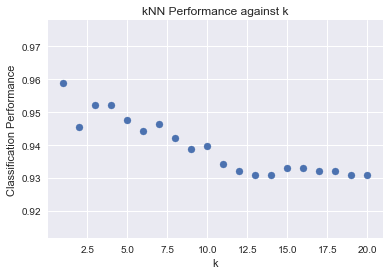

In [119]:
plt.scatter(range(1, 21), knnPerf)
plt.title('kNN Performance against k')
plt.xlabel('k')
plt.ylabel('Classification Performance')
plt.show()